In [13]:
import numpy as np
import matplotlib.pyplot as plt

class image_unit:
    def __init__(self) -> None:
        self.num_of_points = 0
        self.cord_of_points = np.array([])
        self.raw_image = np.array([])
    def print_data(self) -> None:
        print(self.num_of_points)
        print(self.cord_of_points)
        print(self.raw_image)
        # Plotting the array as a grayscale image
        plt.imshow(self.raw_image, cmap='viridis')
        plt.colorbar()  # Adding a colorbar to show intensity scale
        plt.title('Visualization')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()

100
No. 1
<class 'numpy.float64'>
10
[[ 4.90713266 28.03953829]
 [32.84440351 13.57851211]
 [52.97361097 13.17095481]
 [ 6.08836544  8.06791729]
 [16.43699632 10.29119369]
 [51.67877819 59.35360808]
 [30.56994402 52.70290573]
 [20.15551056 48.03884791]
 [41.31064392  7.4202662 ]
 [22.6720807  19.91307516]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


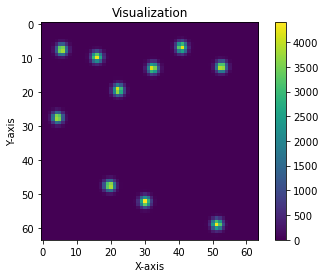

In [14]:
# Specify the path to your text file
file_path = './Clusters_2D_100.txt'
images = []

# For every image:
# Line 1: number of points(10)
# Line 2-11: exact positions of the points
# Others: grayscale image
with open(file_path, 'r') as file:
    cop = [] # Store cordinates of points tempoarily
    ri = [] # Store raw image tempoarily
    for line in file:
        numbers = []
        numbers = [float(s) for s in line.strip().split()]
        if len(numbers) == 1:
            if len(images) > 0:
                images[-1].raw_image = np.array(ri).T
                ri.clear()
            images.append(image_unit())
            images[-1].num_of_points = int(numbers[0])
        elif len(numbers) == 2:
            cop.append(numbers)
            if len(cop) == images[-1].num_of_points:
                images[-1].cord_of_points = np.array(cop)
                cop.clear()
        else:
            ri.append(numbers)
    images[-1].raw_image = np.array(ri).T

print(len(images))

# Print the list of numbers
for i in range(1):
    print('No.', i + 1)
    print(type(images[i].raw_image[0][0]))
    images[i].print_data()

In [15]:
def find_local_maxima(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    def is_local_maxima(i, j):
        current = matrix[i][j]
        # Check all eight possible neighbors
        neighbors = [
            (i-1, j-1), (i-1, j), (i-1, j+1),
            (i, j-1),            (i, j+1),
            (i+1, j-1), (i+1, j), (i+1, j+1)
        ]
        for x, y in neighbors:
            if 0 <= x < rows and 0 <= y < cols:
                if matrix[x][y] >= current:
                    return False
        return True

    local_maxima = []
    for i in range(rows):
        for j in range(cols):
            if is_local_maxima(i, j):
                local_maxima.append((j, i))
    
    return local_maxima

# 查找局部最大值 Find the local maximum
local_maxima = find_local_maxima(images[0].raw_image)


print("Local Maxima:", local_maxima) # 局部最大值的位置

Local Maxima: [(41, 7), (6, 8), (16, 10), (32, 13), (52, 13), (22, 19), (4, 28), (20, 48), (30, 52), (51, 59)]


In [16]:
import cv2

# Define the color (B, G, R) and thickness of the cross marks
# color = (0, 255, 0)  # Green color
# cross_length = 10  # Length of the cross arms
# thickness = 2  # Thickness of the lines
def mark_point(image: np.array, points: list, color = (0, 255, 0), type = 'normal', cross_length = 2, thickness = 1) -> np.array:
    # Ensure the image is a NumPy array with the correct dtype
    if image.dtype != np.uint8:
        marked_image = (image / np.max(image) * 255).astype(np.uint8)
    else:
        marked_image = np.copy(image)
    if len(marked_image.shape) == 2 or (len(marked_image.shape) == 3 and marked_image.shape[2] == 1):
        marked_image = cv2.applyColorMap(marked_image, cv2.COLORMAP_TWILIGHT_SHIFTED)
    if type == 'normal':
        for (x, y) in points:
            cv2.line(marked_image, (x - cross_length, y), (x + cross_length, y), color, thickness)
            cv2.line(marked_image, (x, y - cross_length), (x, y + cross_length), color, thickness)
    elif type == 'skew':
        for (x, y) in points:
            cv2.line(marked_image, (x - cross_length, y - cross_length), (x + cross_length, y + cross_length), color, thickness)
            cv2.line(marked_image, (x + cross_length, y - cross_length), (x - cross_length, y + cross_length), color, thickness)
    # Display the image with marked points
    return marked_image

[(4.90713265801572, 28.039538291703874), (32.84440350822294, 13.578512105334035), (52.973610967129076, 13.170954812016848), (6.088365442640924, 8.067917290512826), (16.436996322861567, 10.291193687624183), (51.67877819316273, 59.35360808253424), (30.56994401674475, 52.702905728831574), (20.15551056223808, 48.038847909050986), (41.31064392120531, 7.420266202730436), (22.67208069830488, 19.913075159064046)]


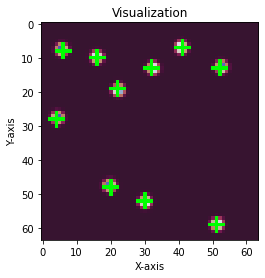

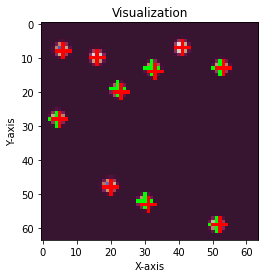

In [17]:
print([tuple(row) for row in images[0].cord_of_points])
marked_test = mark_point(images[0].raw_image, find_local_maxima(images[0].raw_image))
plt.imshow(marked_test)
plt.title('Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
marked_test = mark_point(marked_test, [tuple(row) for row in np.round(images[0].cord_of_points).astype(int)], (255, 0, 0))
plt.imshow(marked_test)
plt.title('Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

[[0.3106439212053118, 0.4202662027304358, 0.5226120233397542], [0.08836544264092439, 0.0679172905128258, 0.11145048139748018], [0.4369963228615674, 0.2911936876241832, 0.525128127133466], [0.8444035082229391, 0.5785121053340347, 1.0235690209835508], [0.9736109671290762, 0.17095481201684848, 0.9885058740673882], [0.6720806983048817, 0.9130751590640465, 1.133754255177819], [0.90713265801572, 0.039538291703873796, 0.9079939073306196], [0.15551056223808146, 0.03884790905098612, 0.1602894101468899], [0.5699440167447491, 0.7029057288315741, 0.9049379237535496], [0.6787781931627279, 0.3536080825342367, 0.7653616867513013], [0.9116345573590756, 1.9320827094871742, 2.136356983856064], [0.6893560787946882, 3.579733797269564, 3.6455048844687017], [8.973610967129076, 6.8290451879831515, 11.276593101149613], [6.026389032870924, 11.829045187983152, 13.27567982571342], [2.3279193016951183, 6.0869248409359535, 6.516890538777514], [11.327919301695118, 10.086924840935954, 15.167986301826872], [6.3279193

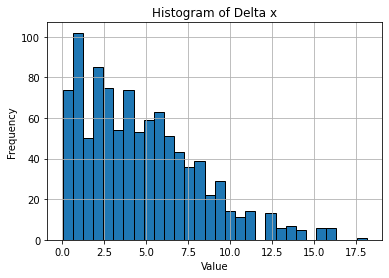

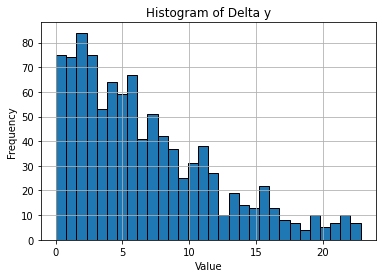

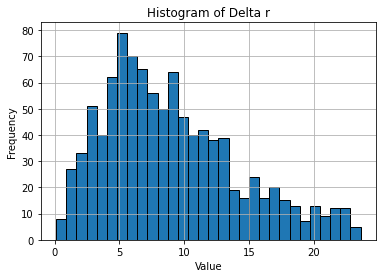

In [22]:
import math
def distance(p, q):
    # Function to calculate Euclidean distance between points p and q
    return math.sqrt((q[0] - p[0])**2 + (q[1] - p[1])**2)

def smallest_distance_to_set(point, point_set):
    # point is a tuple (x, y) representing the point P
    # point_set is a list of tuples [(x1, y1), (x2, y2), ...] representing the set S
    
    if not point_set:
        return float('inf')  # If point_set is empty, return infinity
    
    x_distance = float('inf')
    y_distance = float('inf')
    min_distance = float('inf')
    
    for q in point_set:
        dist = distance(point, q)
        if dist < min_distance:
            min_distance = dist
            x_distance = abs(point[0] - q[0])
            y_distance = abs(point[1] - q[1])
    
    return [x_distance, y_distance, min_distance]

dist = []
for i in range (len(images)):
    finded = find_local_maxima(images[i].raw_image)
    for j in range(len(finded)):
        dist.append(smallest_distance_to_set(finded[j], [tuple(row) for row in images[0].cord_of_points]))
print(dist)
dist_array = np.array(dist).T   
print(dist_array.shape)
print(dist_array)

# Plotting the histogram
plt.hist(dist_array[0], bins=30, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Delta x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.hist(dist_array[1], bins=30, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Delta y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.hist(dist_array[2], bins=30, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Delta r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
def find_weighted_average_coordinates(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    def is_local_maxima(i, j):
        current = matrix[i][j]
        # Check all eight possible neighbors
        neighbors = [
            (i-1, j-1), (i-1, j), (i-1, j+1),
            (i, j-1),            (i, j+1),
            (i+1, j-1), (i+1, j), (i+1, j+1)
        ]
        for x, y in neighbors:
            if 0 <= x < rows and 0 <= y < cols:
                if matrix[x][y] >= current:
                    return False
        return True

    # Find local maxima coordinates
    local_maxima = []
    for i in range(rows):
        for j in range(cols):
            if is_local_maxima(i, j):
                local_maxima.append((i, j))
    
    # Classify non-zero points based on their nearest local maxima
    groups = {}
    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] != 0:
                min_distance = float('inf')
                nearest_maxima = None
                for x, y in local_maxima:
                    distance = abs(x - i) + abs(y - j)
                    if distance < min_distance:
                        min_distance = distance
                        nearest_maxima = (x, y)
                if nearest_maxima not in groups:
                    groups[nearest_maxima] = []
                groups[nearest_maxima].append((i, j, matrix[i][j]))  # Include the value of the point
    
    # Calculate the weighted average coordinates of each group
    result = []
    for key, points in groups.items():
        total_weight = sum(p[2] for p in points)
        if total_weight == 0:
            raise ValueError("Total weight cannot be zero")
        weighted_sum_x = sum(p[0] * p[2] for p in points)
        weighted_sum_y = sum(p[1] * p[2] for p in points)
        avg_coordinates = (weighted_sum_x / total_weight, weighted_sum_y / total_weight)
        result.append(avg_coordinates)
    
    return result

# 示例矩阵
matrix = images[0].raw_image
# 查找局部最大值的坐标并分类非零点，然后计算每组的加权平均坐标
num_weighted_average_points = len(weighted_average_coordinates)
print("加权平均点的个数：", num_weighted_average_points)
weighted_average_coordinates = find_weighted_average_coordinates(matrix)
print("每一组的加权平均坐标：", weighted_average_coordinates)


NameError: name 'weighted_average_coordinates' is not defined